### P4 Wine Impl with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from urllib.request import urlretrieve

In [2]:
def load_wine_data():
    train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    urlretrieve(train_url, "wine_train.data")
    data = np.loadtxt("wine_train.data", delimiter=",")

    labels = data[:, 0].astype(int)-1
    features = data[:, 1:]

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

In [3]:
class wine_net(nn.Module):
    def __init__(self, input_size=13, hidden_size=10, output_size=3):
        super(wine_net, self).__init__()

        self.hidden_layers = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.sigmoid(x)

        x = self.output(x)
        x = self.sigmoid(x)

        return x

In [4]:
def train_model(model, X_train, y_train, epochs=1000, learning_rate=0.5):
    """
    Train the PyTorch model
    Compare this with Problem 3 - PyTorch handles all gradient calculations!
    """
    X_tensor = torch.FloatTensor(X_train)
    y_tensor = torch.LongTensor(y_train)
    
    y_one_hot = torch.nn.functional.one_hot(y_tensor, num_classes=3).float()
    
    criterion = nn.MSELoss()
    
    # optimizer (SGD)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    loss_history = []
    
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_tensor)
        loss = criterion(outputs, y_one_hot)
        
        # Backward pass and optimization
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()       
        
        loss_history.append(loss.item())
        
        if epoch % 100 == 0:
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == y_tensor).float().mean() * 100
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Train Accuracy = {accuracy:.2f}%")
    
    return loss_history

In [5]:
def evaluate_model(model, X, y):
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.LongTensor(y)
    
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_tensor).float().mean() * 100
    
    return accuracy.item()

PROBLEM 4: Wine Classification with PyTorch
Epoch 0: Loss = 0.2423, Train Accuracy = 40.85%
Epoch 100: Loss = 0.1562, Train Accuracy = 69.01%
Epoch 200: Loss = 0.1136, Train Accuracy = 87.32%
Epoch 300: Loss = 0.0697, Train Accuracy = 98.59%
Epoch 400: Loss = 0.0442, Train Accuracy = 98.59%
Epoch 500: Loss = 0.0310, Train Accuracy = 98.59%
Epoch 600: Loss = 0.0236, Train Accuracy = 99.30%
Epoch 700: Loss = 0.0190, Train Accuracy = 99.30%
Epoch 800: Loss = 0.0159, Train Accuracy = 99.30%
Epoch 900: Loss = 0.0136, Train Accuracy = 99.30%

Final Results with 5 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


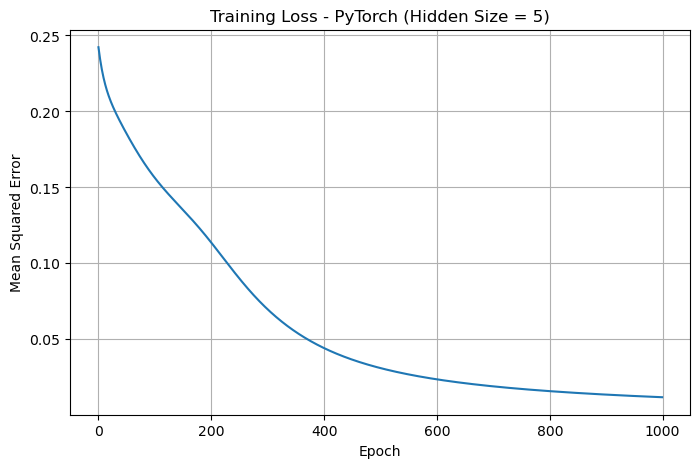

Epoch 0: Loss = 0.2572, Train Accuracy = 28.17%
Epoch 100: Loss = 0.1412, Train Accuracy = 93.66%
Epoch 200: Loss = 0.0674, Train Accuracy = 97.18%
Epoch 300: Loss = 0.0390, Train Accuracy = 97.89%
Epoch 400: Loss = 0.0270, Train Accuracy = 98.59%
Epoch 500: Loss = 0.0205, Train Accuracy = 98.59%
Epoch 600: Loss = 0.0166, Train Accuracy = 98.59%
Epoch 700: Loss = 0.0140, Train Accuracy = 98.59%
Epoch 800: Loss = 0.0121, Train Accuracy = 100.00%
Epoch 900: Loss = 0.0106, Train Accuracy = 100.00%

Final Results with 10 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


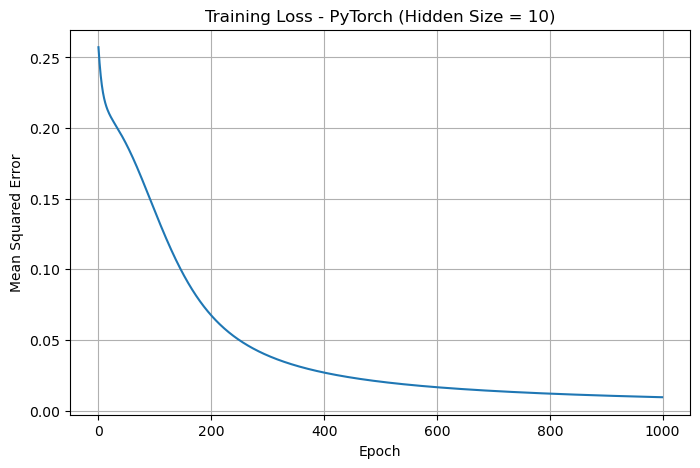

Epoch 0: Loss = 0.2277, Train Accuracy = 40.14%
Epoch 100: Loss = 0.1147, Train Accuracy = 97.18%
Epoch 200: Loss = 0.0523, Train Accuracy = 97.89%
Epoch 300: Loss = 0.0314, Train Accuracy = 99.30%
Epoch 400: Loss = 0.0225, Train Accuracy = 99.30%
Epoch 500: Loss = 0.0178, Train Accuracy = 99.30%
Epoch 600: Loss = 0.0148, Train Accuracy = 99.30%
Epoch 700: Loss = 0.0127, Train Accuracy = 99.30%
Epoch 800: Loss = 0.0111, Train Accuracy = 99.30%
Epoch 900: Loss = 0.0100, Train Accuracy = 99.30%

Final Results with 20 hidden neurons:
Training Accuracy: 100.00%
Test Accuracy: 100.00%


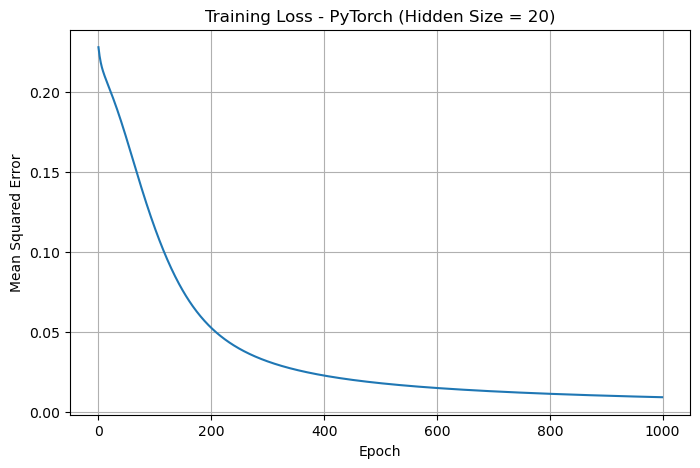

In [6]:
if __name__ == "__main__":
    print("PROBLEM 4: Wine Classification with PyTorch")
    print("=" * 60)
    
    X_train, y_train, X_test, y_test = load_wine_data()
    
    hidden_sizes = [5, 10, 20]
    
    for hidden_size in hidden_sizes:
        torch.manual_seed(42)
        
        model = wine_net(input_size=13, hidden_size=hidden_size, output_size=3)
        loss_history = train_model(model, X_train, y_train, epochs=1000, learning_rate=0.5)
        
        train_acc = evaluate_model(model, X_train, y_train)
        test_acc = evaluate_model(model, X_test, y_test)
        
        print(f"\nFinal Results with {hidden_size} hidden neurons:")
        print(f"Training Accuracy: {train_acc:.2f}%")
        print(f"Test Accuracy: {test_acc:.2f}%")
        
        plt.figure(figsize=(8, 5))
        plt.plot(loss_history)
        plt.title(f'Training Loss - PyTorch (Hidden Size = {hidden_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()
    

Same wine classification setup from Problem3, but here we need to use Pytorch instead of manualy calculating the gradient and handling weight updates. The network learns the how to identify wine types from chemical measurements but here as we are using pytorch we dont need to worry about backpropagation step.